**Takewaways**

Need to do a selection of years not all years will make sense to use. Some events have years that seem out of place. 

Consider chopping of different percentages from top and bottom or fixed cutoff. Also notice age and gender effects on finish times.

Min, max, and average temp seem to all convey the same information with high correlation.

## Imports and Functions

In [1]:
# imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# functions
def num_age(x):
    '''make age categories numeric'''
    if x == '18-39':
        return 0
    elif x == '40-44':
        return 1
    elif x == '45-49':
        return 2
    elif x == '50-54':
        return 3
    elif x == '55-59':
        return 4
    elif x == '60-64':
        return 5
    elif x == '65-69':
        return 6
    return 7


def cat_clean(x):
    '''binary columns were floats, make them ints'''
    return int(x)


def prep(df):
    '''prepare dataframe for EDA'''
    df['age'] = df['age'].apply(lambda x: num_age(x))
    df['clear'] = df['clear'].apply(lambda x: cat_clean(x))
    df['overcast'] = df['overcast'].apply(lambda x: cat_clean(x))
    df['partially_cloudy'] = df['partially_cloudy'].apply(lambda x: cat_clean(x))
    df['rain'] = df['rain'].apply(lambda x: cat_clean(x))

    cols = ['year', 'age', 'male', 'time_seconds', 'minimum_temperature',
           'maximum_temperature', 'temperature', 'relative_humidity', 'wind_speed',
           'precipitation', 'precipitation_cover', 'cloud_cover', 'clear',
           'overcast', 'partially_cloudy', 'rain']

    for col in cols:
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

    df.drop(columns=['maximum_temperature', 'minimum_temperature'], inplace=True)

    event_dict = {year: df[df['year'] == year] for year in df['year'].unique()}
    
    return event_dict


def usable(event_dict, num):
    '''specify which years are usable based on minimum number of participants
    returns dict with years that exceed minimum values are correspoding df'''
    can_use = []
    for year in event_dict.keys():
        if len(event_dict[year]) > num:
            can_use.append(year)
    return {year: event_dict[year] for year in can_use}


def top_n(event_dict, num):
    '''take in event dict and first num of finishers that are desired,
    return df of top n racers for all years, use in conjuction with usable()'''
    df = pd.DataFrame()
    for year in event_dict.keys():
        df = pd.concat([df, event_dict[year].sort_values(by='time_seconds').iloc[:num]], ignore_index=True)
    return df
        
    
def n_range(event_dict, low, high):
    '''take in dictionary of dfs from prep(), upper percentage as float, lower percentage as float
    return df'''
    df = pd.DataFrame()
    for year in event_dict.keys():
        df = pd.concat([df, event_dict[year].sort_values(by='time_seconds').iloc[int(len(event_dict[year]) * low): int(len(event_dict[year]) * high)]], ignore_index=True)
    return df

def undo_age(x):
    '''make age categories their division again'''
    if x == 0.0:
        return '18-39'
    elif x == 1.0:
        return '40-44'
    elif x == 2.0:
        return '45-49'
    elif x == 3.0:
        return '50-54'
    elif x == 4.0:
        return '55-59'
    elif x == 5.0:
        return '60-64'
    elif x == 6.0:
        return '65-69'
    return '70+'

## Berlin

In [3]:
berlin = pd.read_csv('./data/Berlin_Data/Clean/Clean_Berlin_Results_Weather.csv')

berlin_dict = prep(berlin)

berlin_10 = top_n(usable(berlin_dict, 10_000), 10_000)
    
berlin_20_80 = n_range(usable(berlin_dict, 10_000), .2, .8)

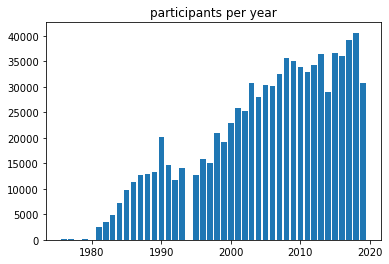

In [4]:
berlin_plotting = berlin.groupby('year').count()
plt.title('participants per year')
plt.bar(x=berlin_plotting.index, height=berlin_plotting['age']);

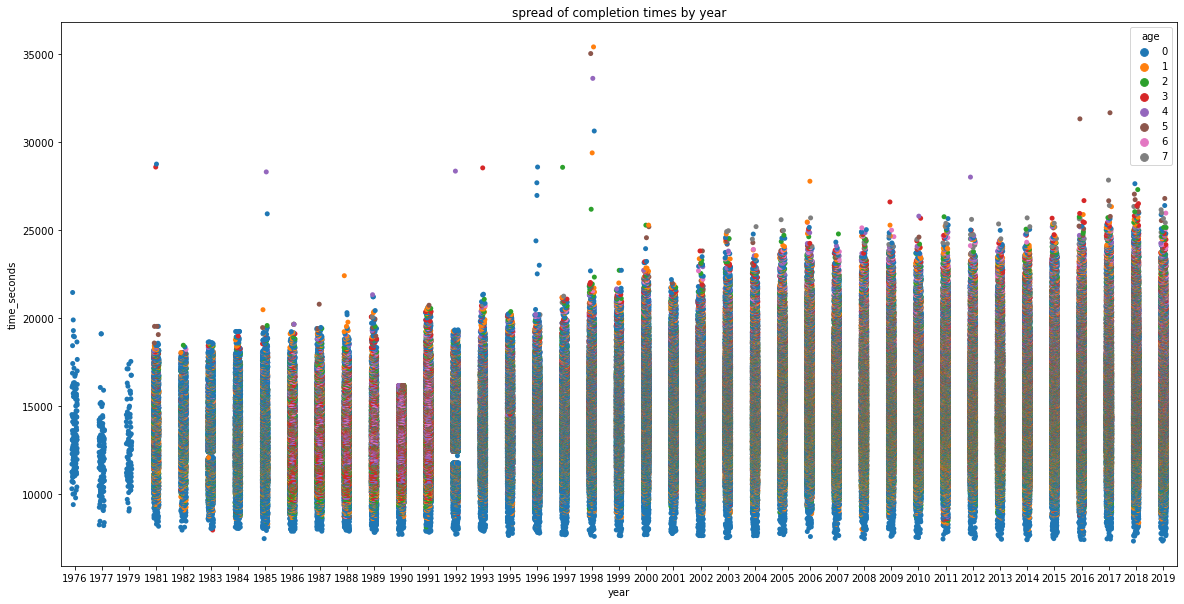

In [5]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year')
sns.stripplot(x=berlin['year'], y=berlin['time_seconds'], hue=berlin['age']);

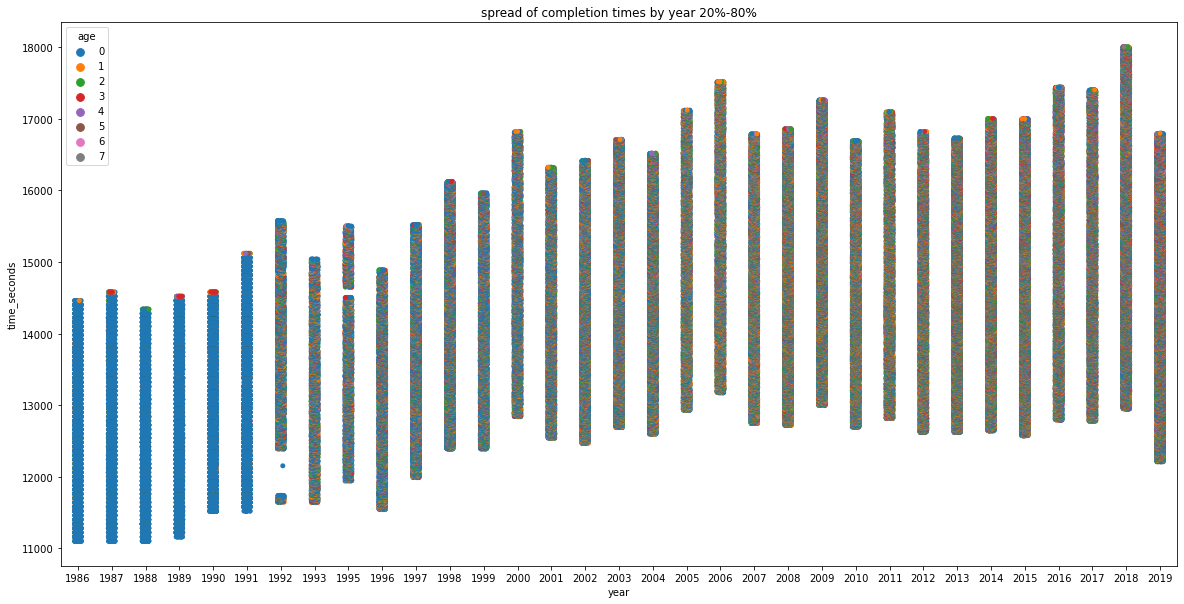

In [6]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year 20%-80%')
sns.stripplot(x=berlin_20_80['year'], y=berlin_20_80['time_seconds'], hue=berlin_20_80['age']);

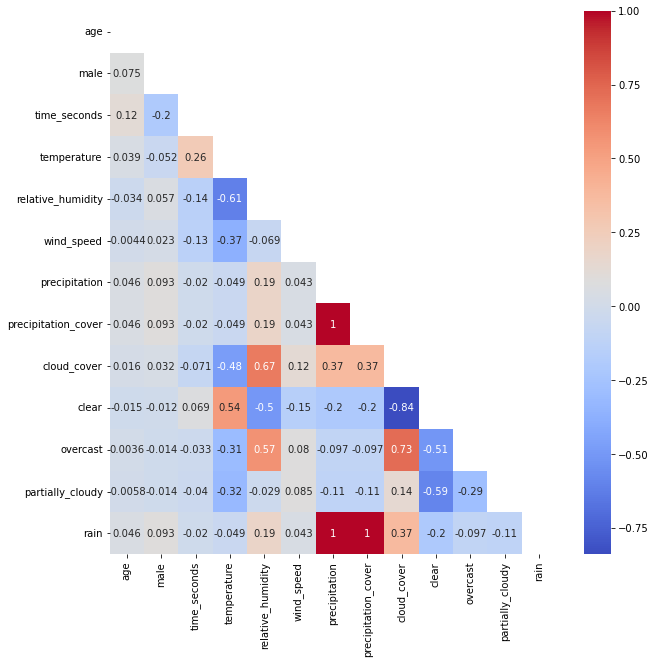

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(berlin_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(berlin_20_80.drop(columns='year').corr())));

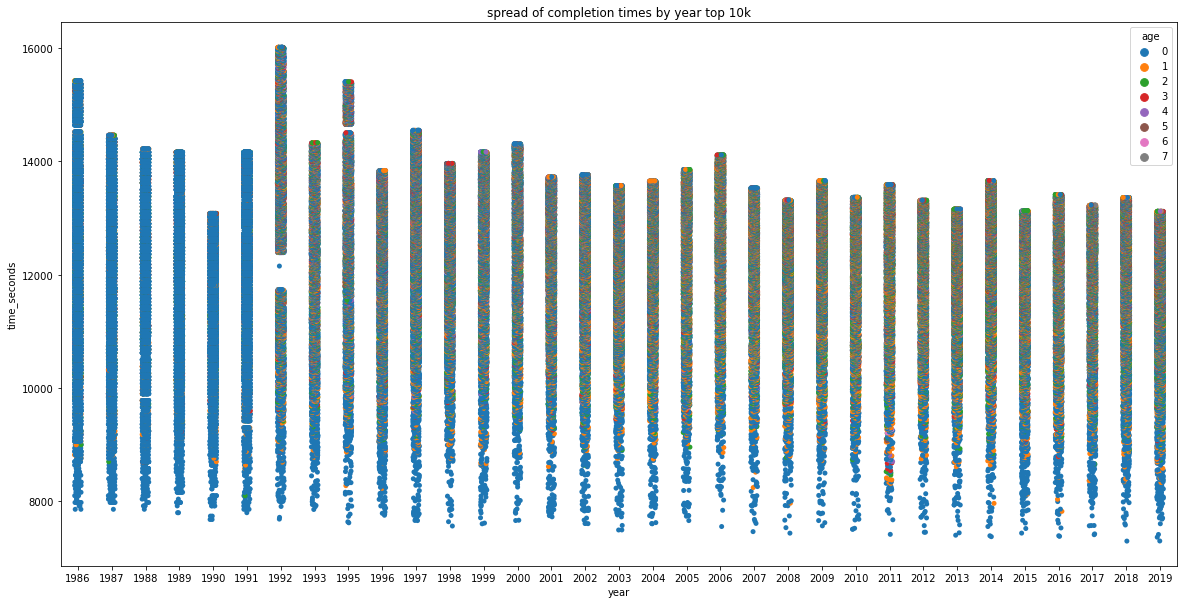

In [8]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year top 10k')
sns.stripplot(x=berlin_10['year'], y=berlin_10['time_seconds'], hue=berlin_10['age']);

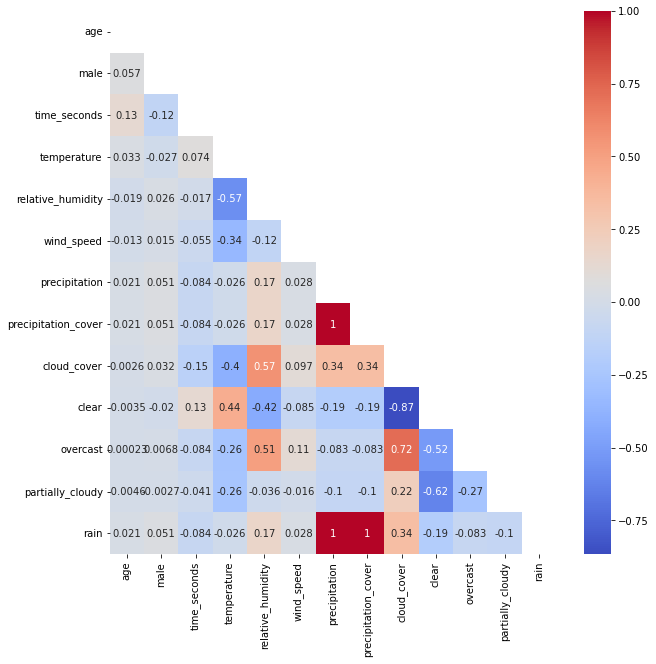

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(berlin_10.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(berlin_10.drop(columns='year').corr())));

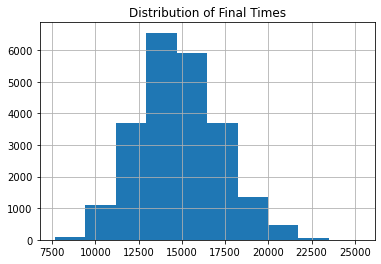

In [10]:
plt.title('Distribution of Final Times')
berlin.query('year == 2000').time_seconds.hist();

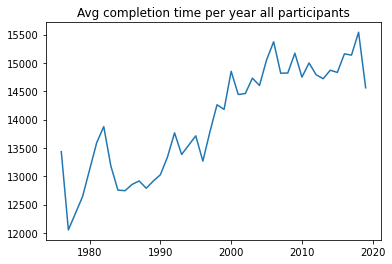

In [11]:
plt.title('Avg completion time per year all participants')
plt.plot(berlin.groupby('year').agg({'time_seconds': 'mean'}));

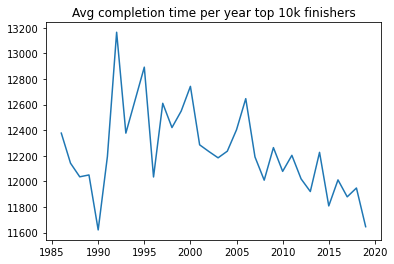

In [12]:
plt.title('Avg completion time per year top 10k finishers')
plt.plot(berlin_10.groupby('year').agg({'time_seconds': 'mean'}));

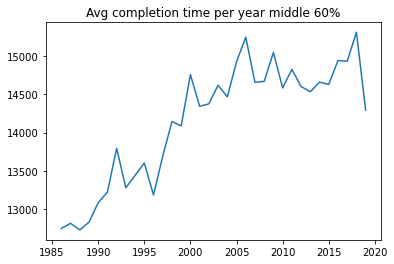

In [13]:
plt.title('Avg completion time per year middle 60%')
plt.plot(berlin_20_80.groupby('year').agg({'time_seconds': 'mean'}));

## Boston

In [14]:
boston = pd.read_csv('./data/Boston_Data/Clean/Clean_Boston_Results_Weather.csv')

boston_dict = prep(boston)

boston_10 = top_n(usable(boston_dict, 10_000), 10_000)
    
boston_20_80 = n_range(usable(boston_dict, 10_000), .2, .8)

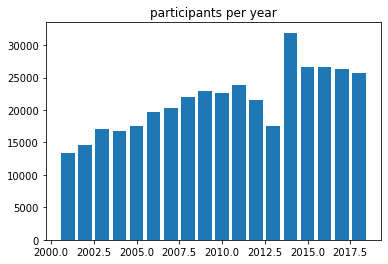

In [15]:
boston_plotting = boston.groupby('year').count()
plt.title('participants per year')
plt.bar(x=boston_plotting.index, height=boston_plotting['age']);

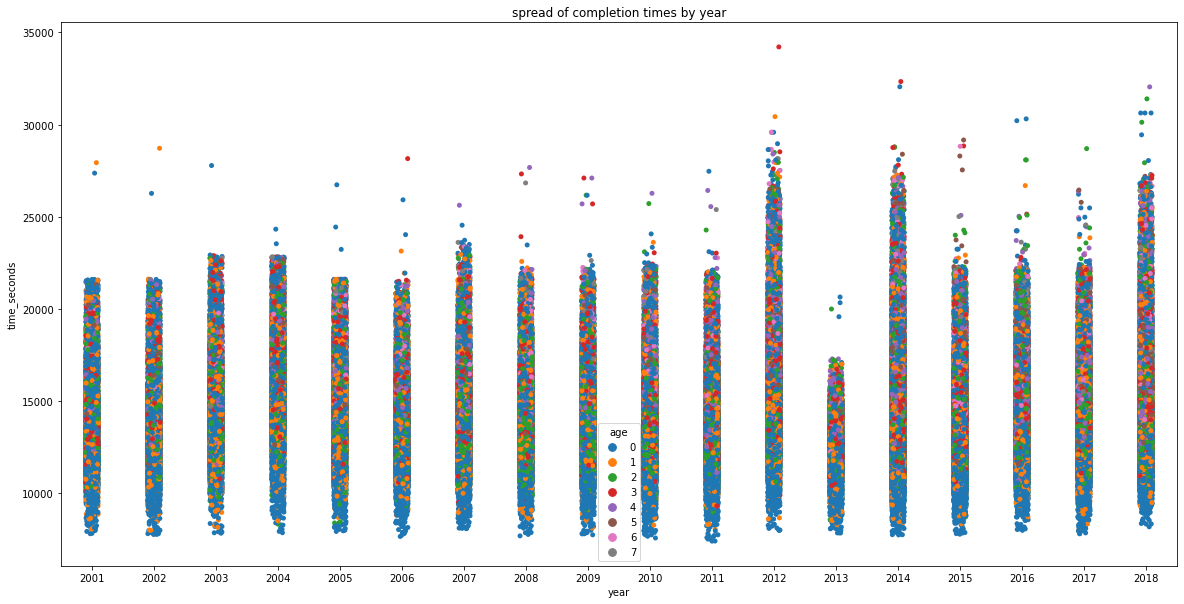

In [16]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year')
sns.stripplot(x=boston['year'], y=boston['time_seconds'], hue=boston['age']);

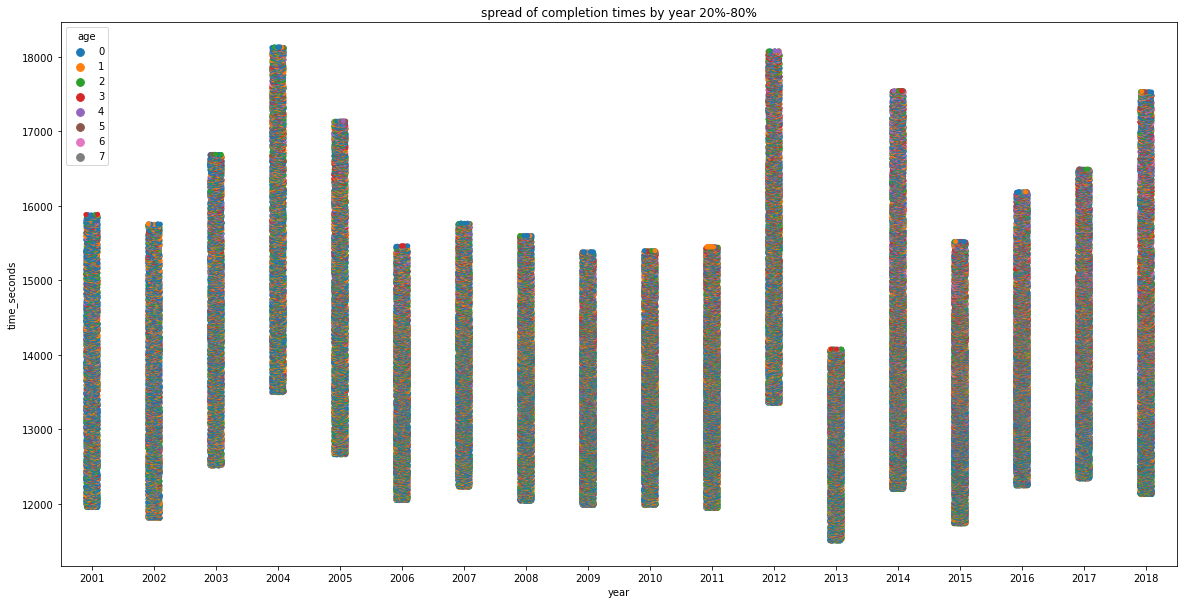

In [17]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year 20%-80%')
sns.stripplot(x=boston_20_80['year'], y=boston_20_80['time_seconds'], hue=boston_20_80['age']);

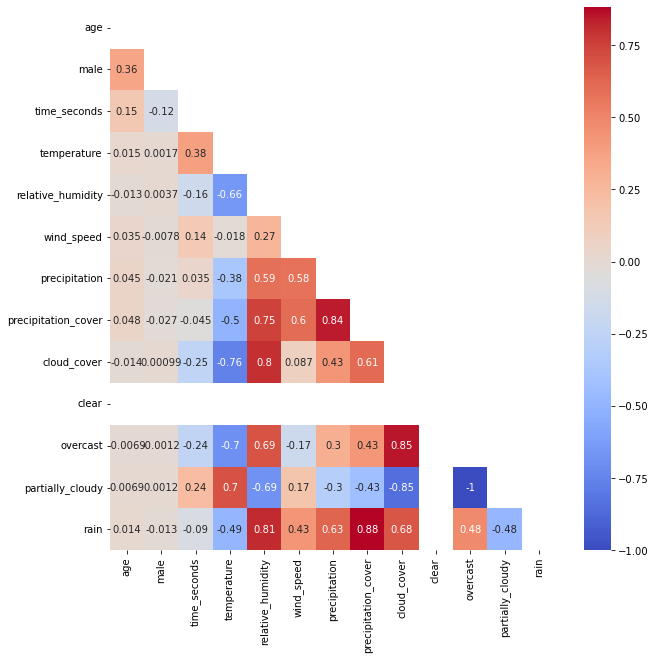

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(boston_20_80.drop(columns='year').corr())));

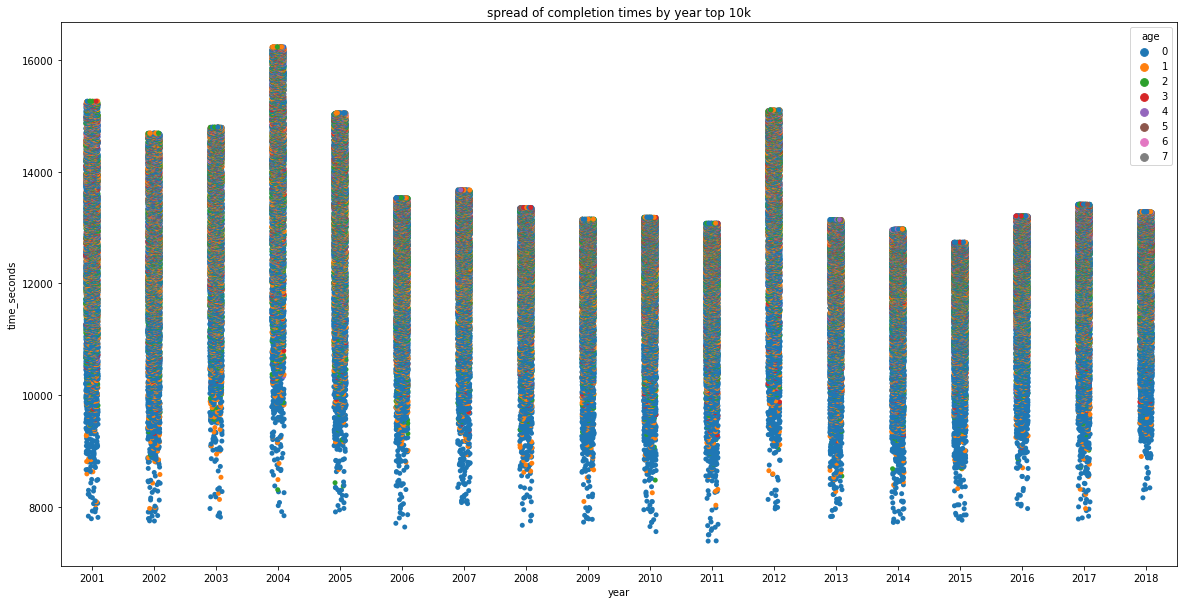

In [19]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year top 10k')
sns.stripplot(x=boston_10['year'], y=boston_10['time_seconds'], hue=boston_10['age']);

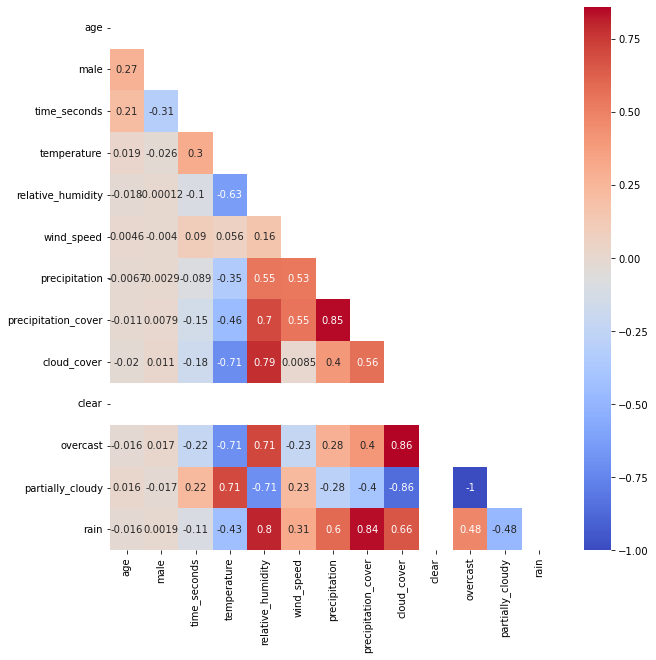

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_10.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(boston_10.drop(columns='year').corr())));

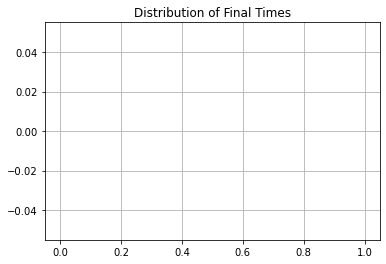

In [21]:
plt.title('Distribution of Final Times')
boston.query('year == 2000').time_seconds.hist();

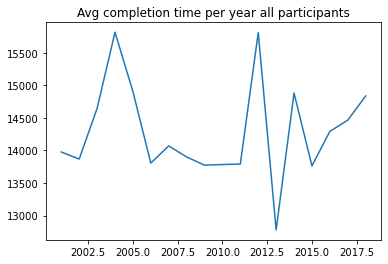

In [22]:
plt.title('Avg completion time per year all participants')
plt.plot(boston.groupby('year').agg({'time_seconds': 'mean'}));

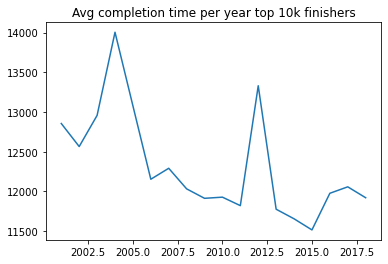

In [23]:
plt.title('Avg completion time per year top 10k finishers')
plt.plot(boston_10.groupby('year').agg({'time_seconds': 'mean'}));

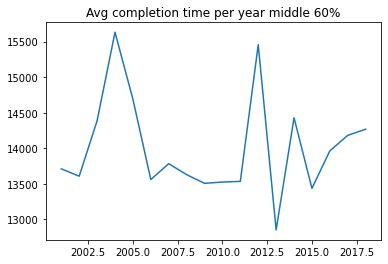

In [24]:
plt.title('Avg completion time per year middle 60%')
plt.plot(boston_20_80.groupby('year').agg({'time_seconds': 'mean'}));

## Chicago

In [25]:
chicago = pd.read_csv('./data/Chicago_Data/Clean/Clean_Chicago_Results_Weather.csv')

chicago_dict = prep(chicago)

chicago_10 = top_n(usable(chicago_dict, 10_000), 10_000)
    
chicago_20_80 = n_range(usable(chicago_dict, 10_000), .2, .8)

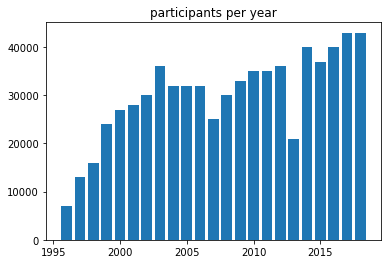

In [26]:
chicago_plotting = chicago.groupby('year').count()
plt.title('participants per year')
plt.bar(x=chicago_plotting.index, height=chicago_plotting['age']);

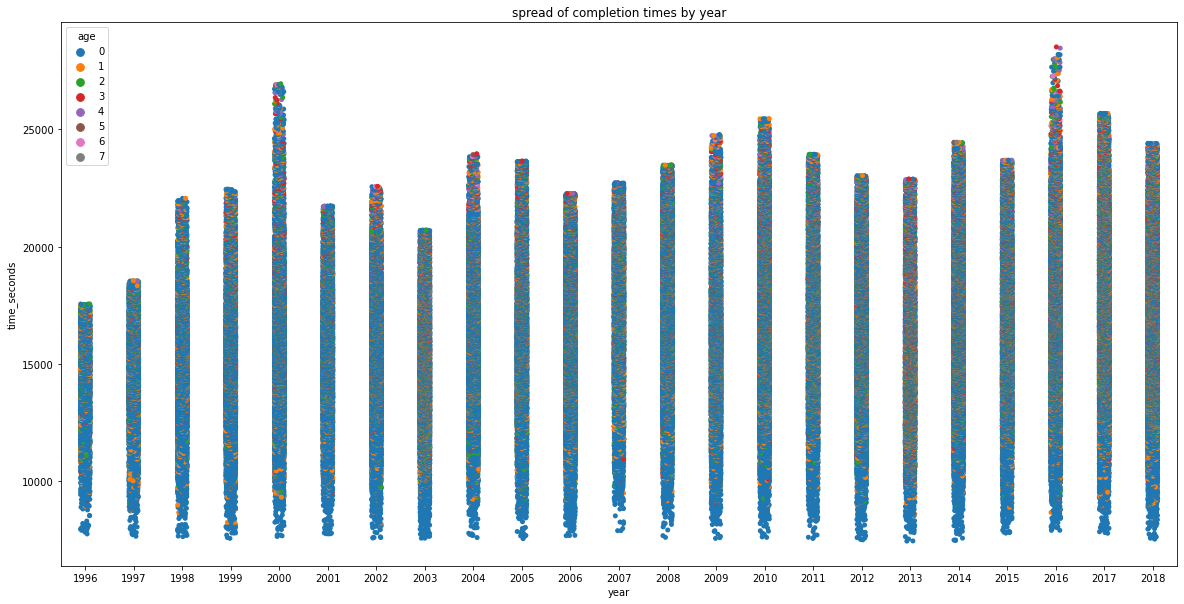

In [27]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year')
sns.stripplot(x=chicago['year'], y=chicago['time_seconds'], hue=chicago['age']);

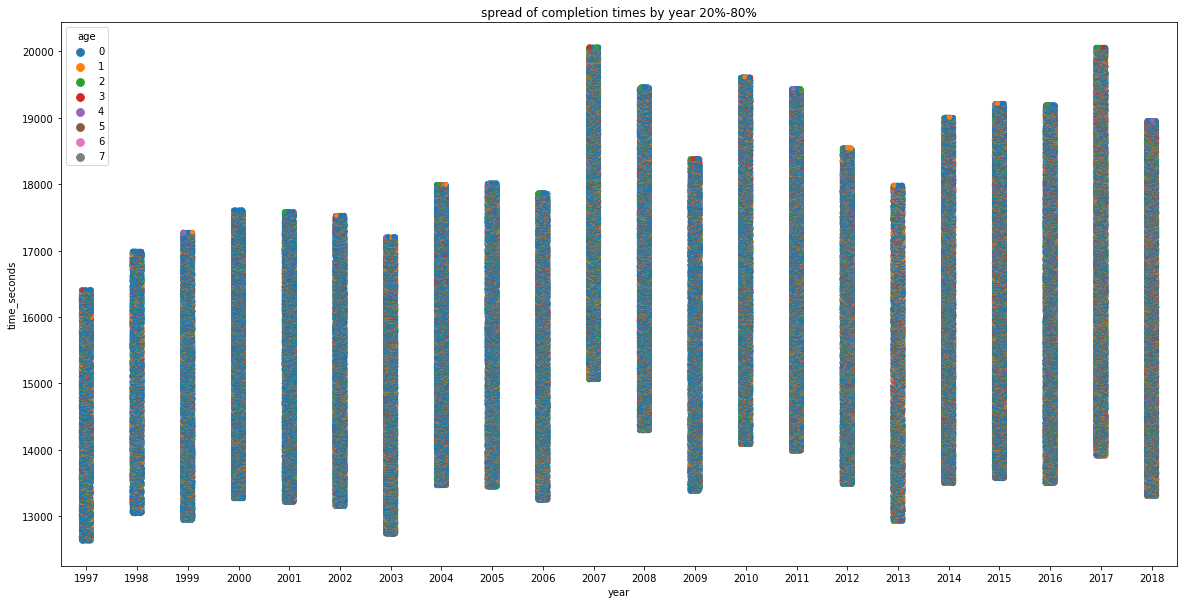

In [28]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year 20%-80%')
sns.stripplot(x=chicago_20_80['year'], y=chicago_20_80['time_seconds'], hue=chicago_20_80['age']);

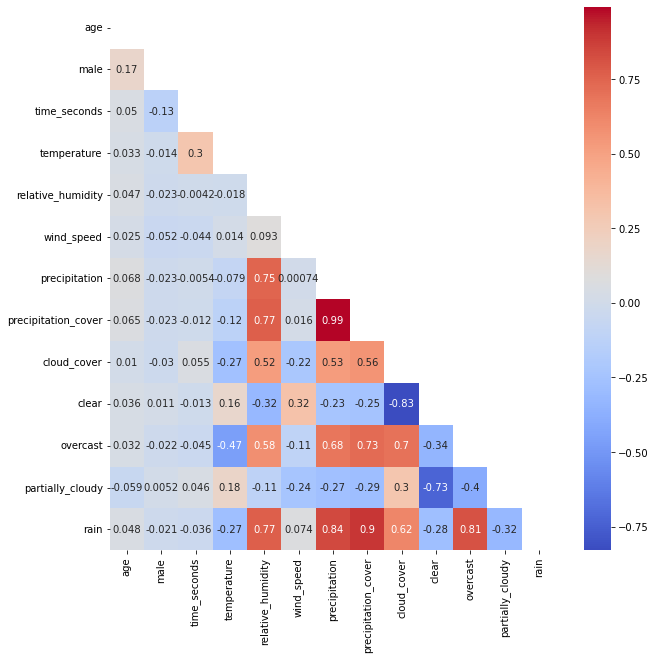

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(chicago_20_80.drop(columns='year').corr())));

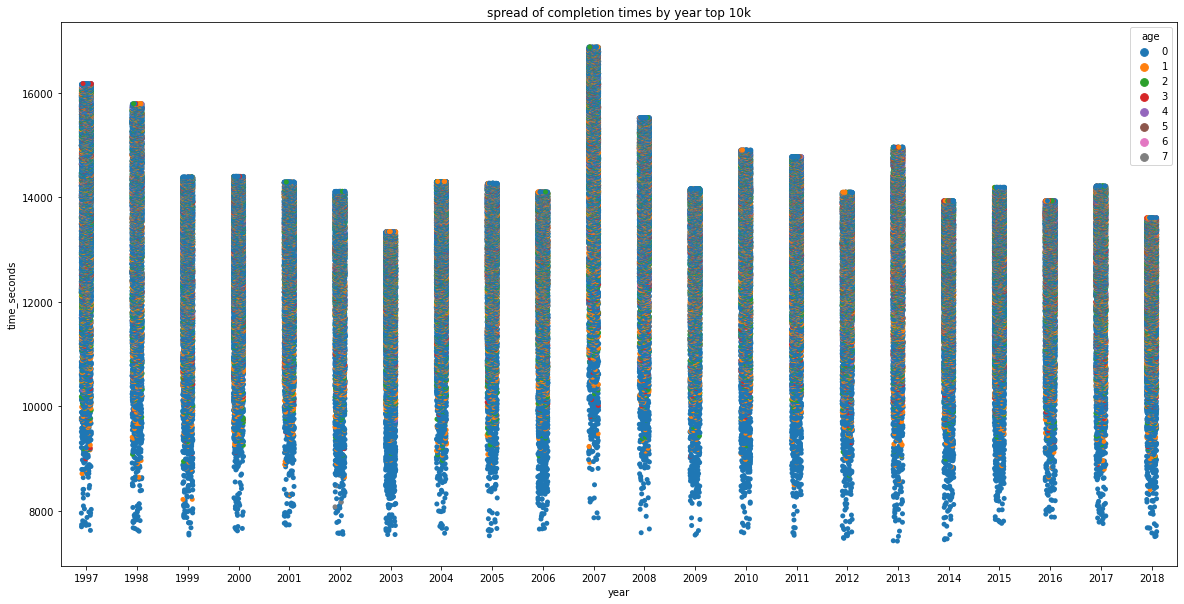

In [30]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year top 10k')
sns.stripplot(x=chicago_10['year'], y=chicago_10['time_seconds'], hue=chicago_10['age']);

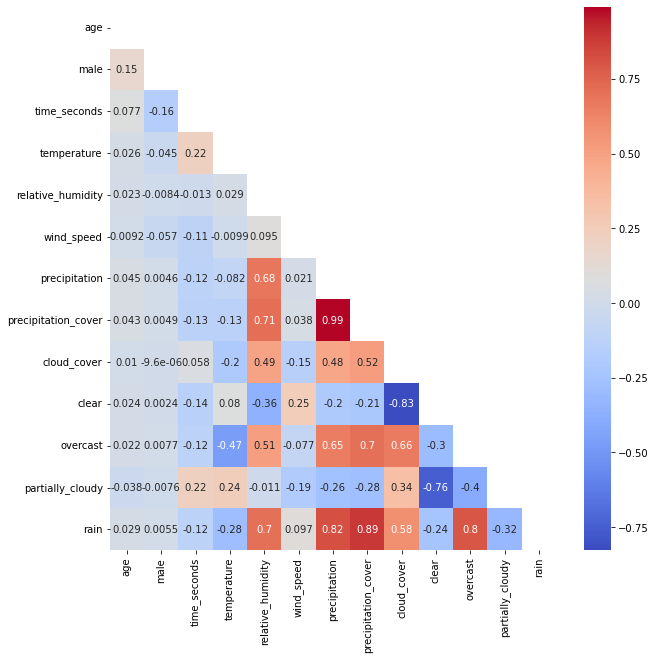

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_10.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(chicago_10.drop(columns='year').corr())));

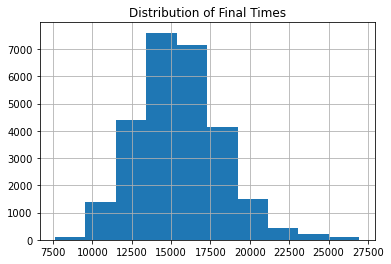

In [32]:
plt.title('Distribution of Final Times')
chicago.query('year == 2000').time_seconds.hist();

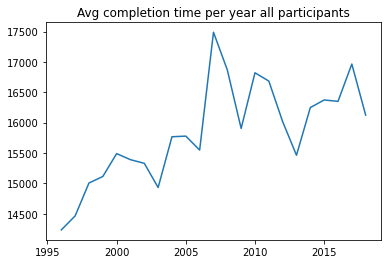

In [33]:
plt.title('Avg completion time per year all participants')
plt.plot(chicago.groupby('year').agg({'time_seconds': 'mean'}));

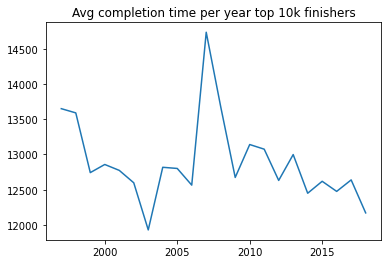

In [34]:
plt.title('Avg completion time per year top 10k finishers')
plt.plot(chicago_10.groupby('year').agg({'time_seconds': 'mean'}));

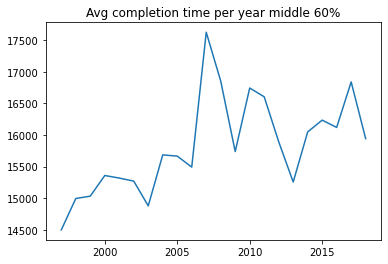

In [35]:
plt.title('Avg completion time per year middle 60%')
plt.plot(chicago_20_80.groupby('year').agg({'time_seconds': 'mean'}));

## London

In [36]:
london = pd.read_csv('./data/London_Data/Clean/Clean_London_Results_Weather.csv')

london_dict = prep(london)

london_10 = top_n(usable(london_dict, 10_000), 10_000)
    
london_20_80 = n_range(usable(london_dict, 10_000), .2, .8)

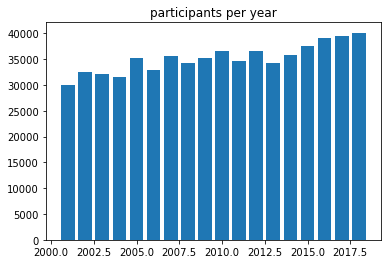

In [37]:
london_plotting = london.groupby('year').count()
plt.title('participants per year')
plt.bar(x=london_plotting.index, height=london_plotting['age']);

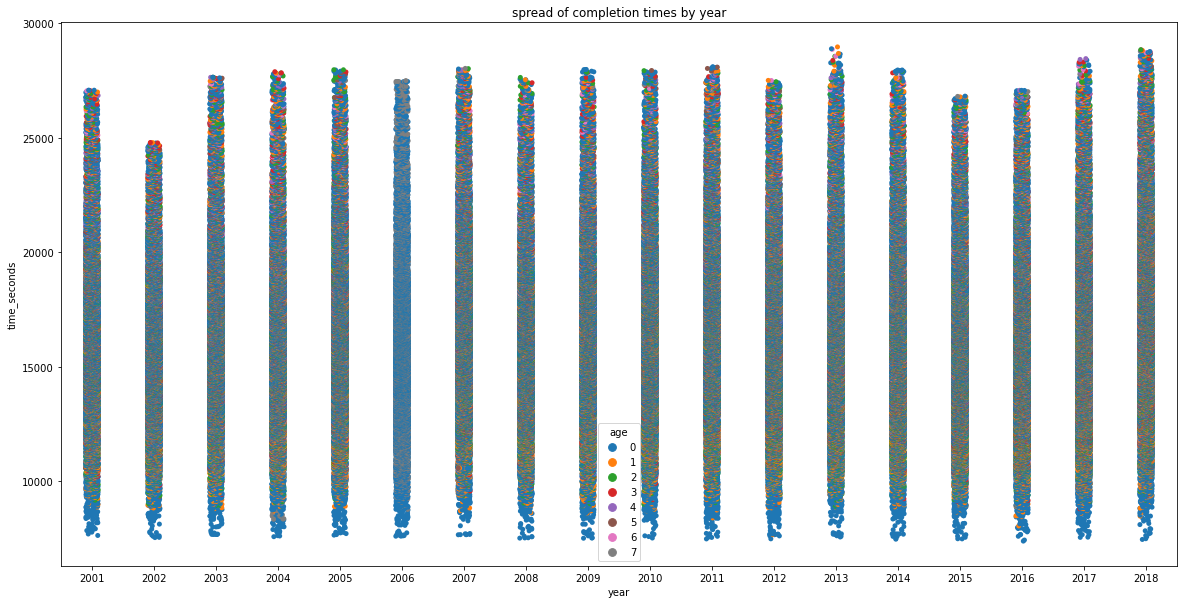

In [38]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year')
sns.stripplot(x=london['year'], y=london['time_seconds'], hue=london['age']);

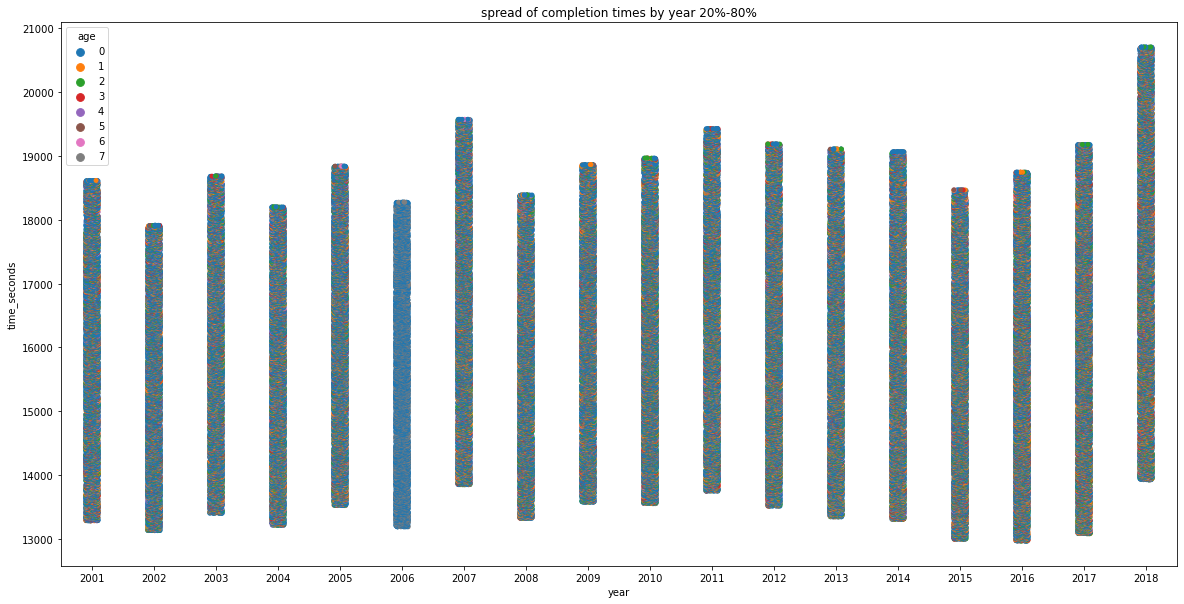

In [39]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year 20%-80%')
sns.stripplot(x=london_20_80['year'], y=london_20_80['time_seconds'], hue=london_20_80['age']);

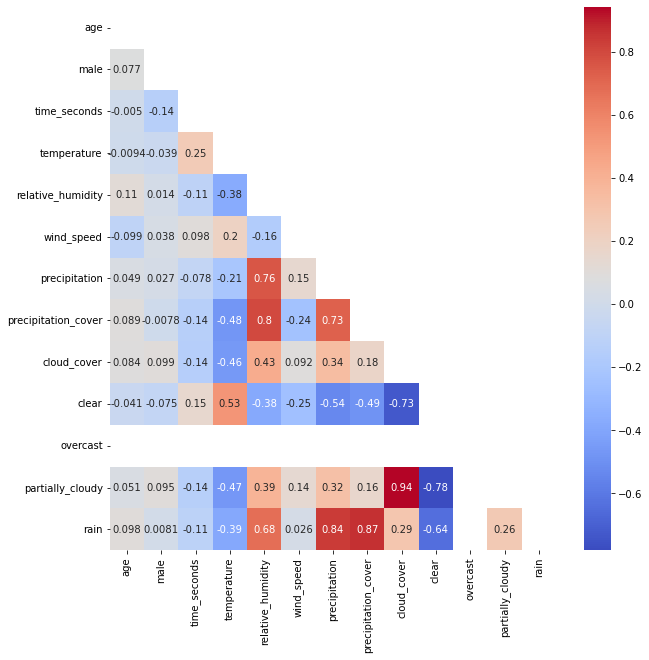

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(london_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(london_20_80.drop(columns='year').corr())));

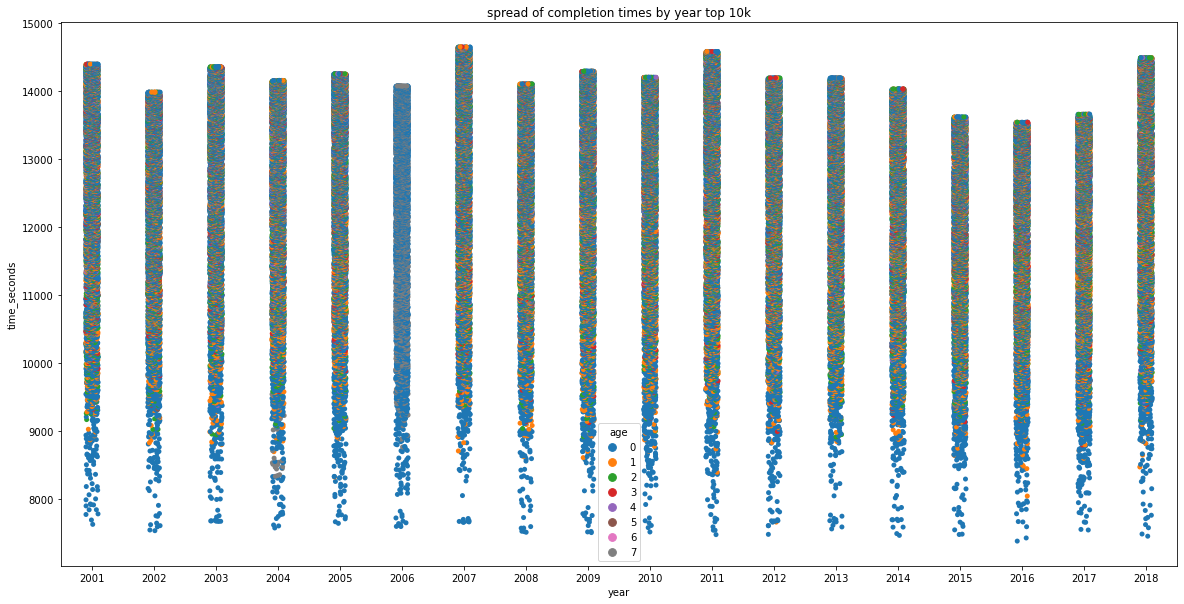

In [41]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year top 10k')
sns.stripplot(x=london_10['year'], y=london_10['time_seconds'], hue=london_10['age']);

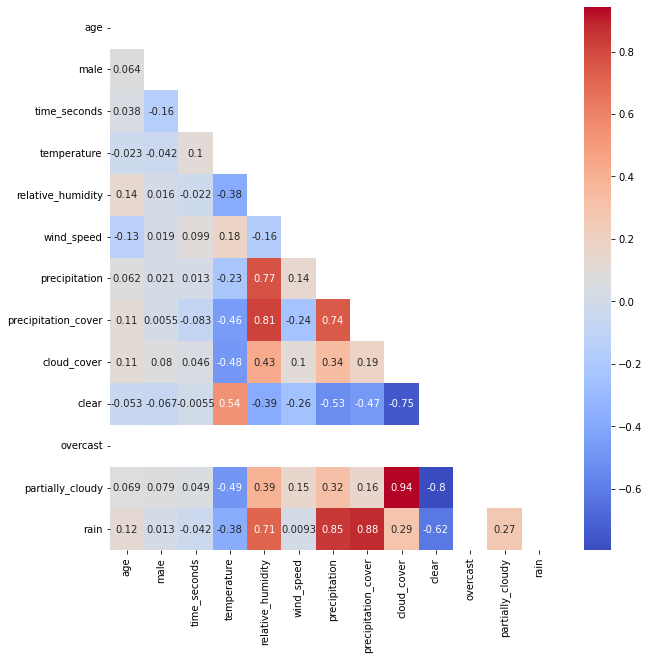

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(london_10.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(london_10.drop(columns='year').corr())));

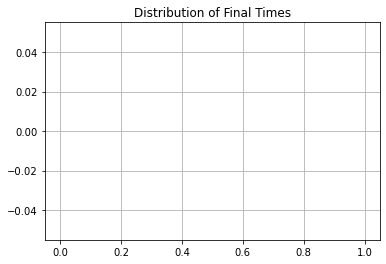

In [43]:
plt.title('Distribution of Final Times')
london.query('year == 2000').time_seconds.hist();

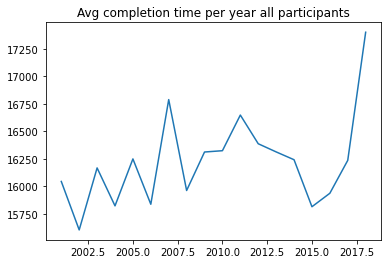

In [44]:
plt.title('Avg completion time per year all participants')
plt.plot(london.groupby('year').agg({'time_seconds': 'mean'}));

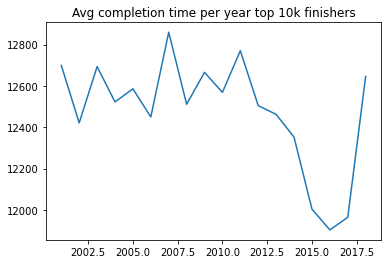

In [45]:
plt.title('Avg completion time per year top 10k finishers')
plt.plot(london_10.groupby('year').agg({'time_seconds': 'mean'}));

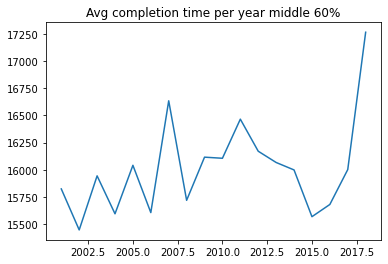

In [46]:
plt.title('Avg completion time per year middle 60%')
plt.plot(london_20_80.groupby('year').agg({'time_seconds': 'mean'}));

## NYC

In [47]:
nyc = pd.read_csv('./data/NYC_Data/Clean/Clean_NYC_Results_Weather.csv')

nyc_dict = prep(nyc)

nyc_10 = top_n(usable(nyc_dict, 10_000), 10_000)
    
nyc_20_80 = n_range(usable(nyc_dict, 10_000), .2, .8)

In [48]:
nyc.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2013, 2014, 2015, 2016, 2017, 2018], dtype=uint16)

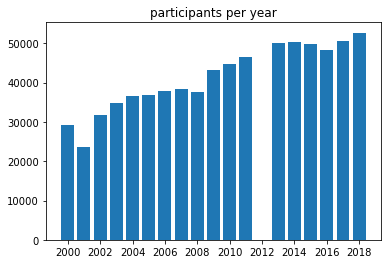

In [49]:
nyc_plotting = nyc.groupby('year').count()
plt.title('participants per year')
plt.xticks(np.arange(2000, 2019, 2))
plt.bar(x=nyc_plotting.index, height=nyc_plotting['age']);

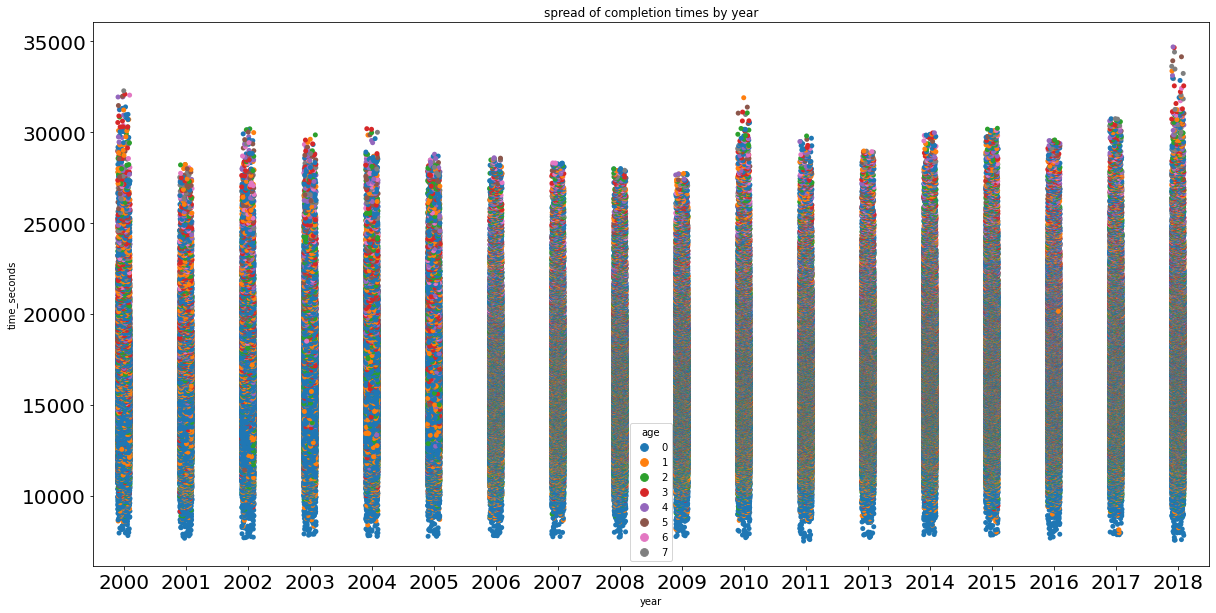

In [50]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.stripplot(x=nyc['year'], y=nyc['time_seconds'], hue=nyc['age']);

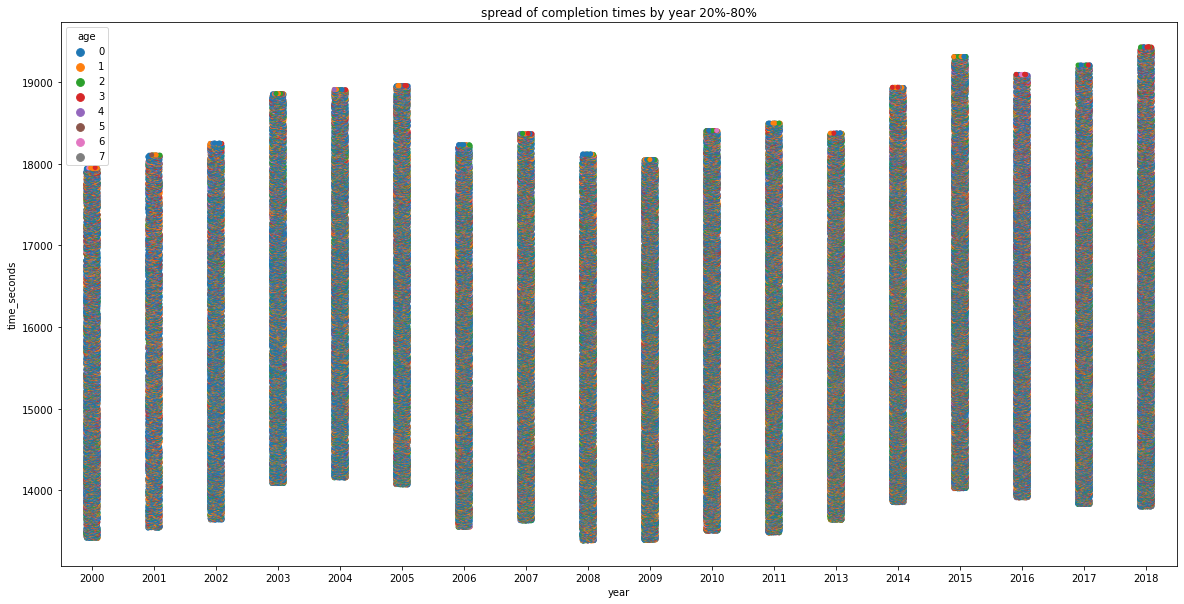

In [51]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year 20%-80%')
sns.stripplot(x=nyc_20_80['year'], y=nyc_20_80['time_seconds'], hue=nyc_20_80['age']);

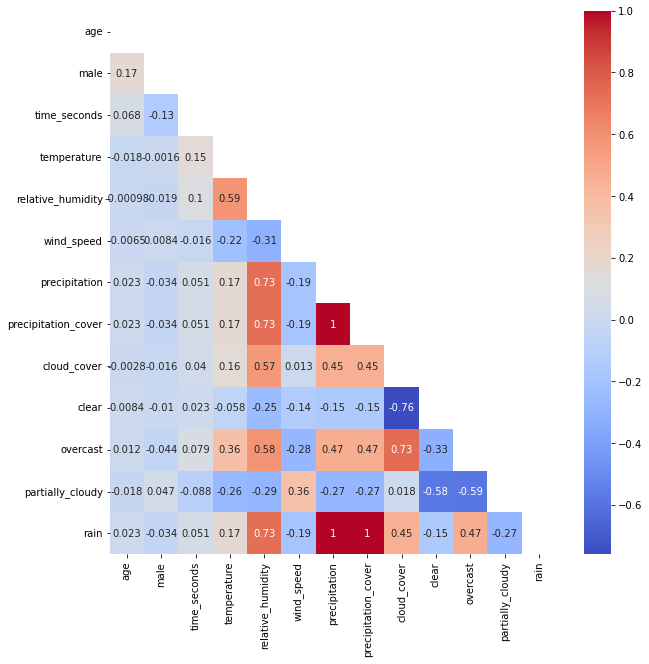

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(nyc_20_80.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(nyc_20_80.drop(columns='year').corr())));

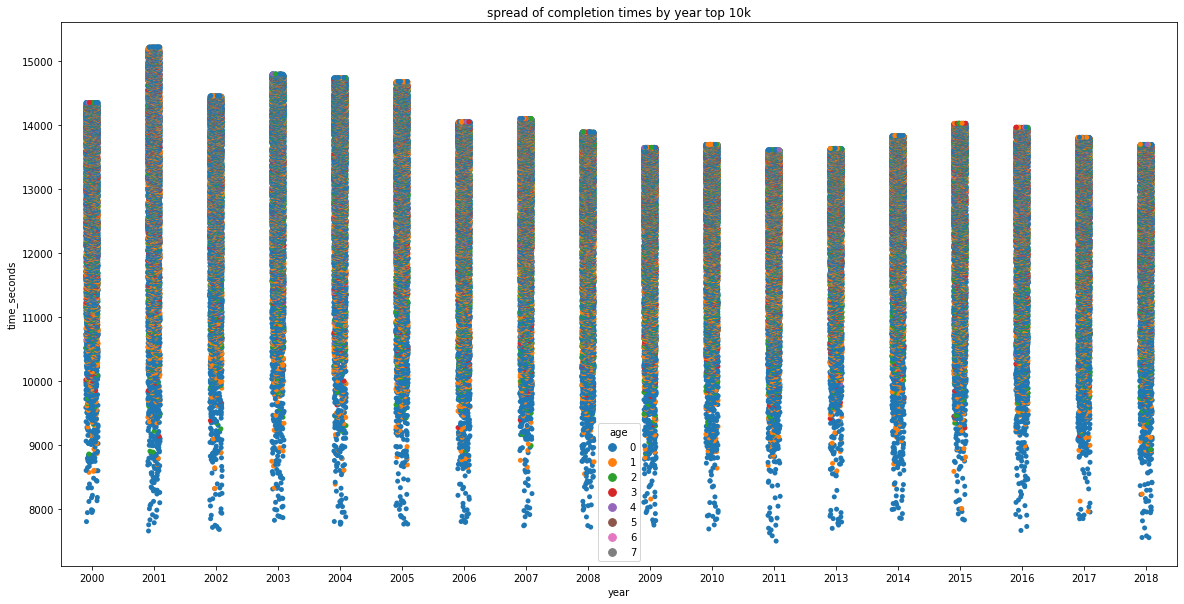

In [53]:
plt.figure(figsize=(20,10))
plt.title('spread of completion times by year top 10k')
sns.stripplot(x=nyc_10['year'], y=nyc_10['time_seconds'], hue=nyc_10['age']);

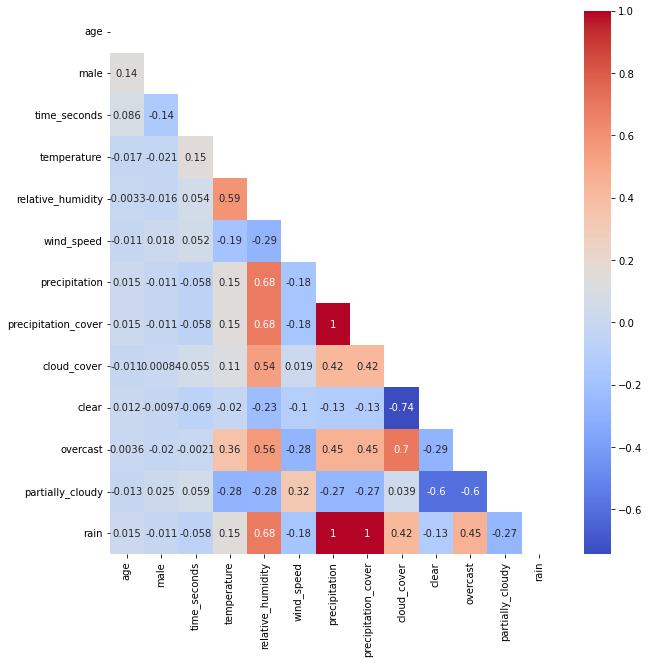

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(nyc_10.drop(columns='year').corr(), annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(nyc_10.drop(columns='year').corr())));

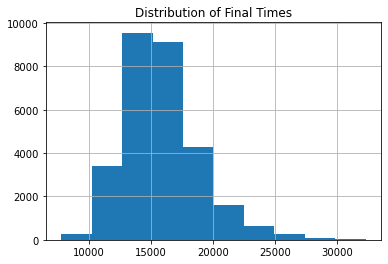

In [55]:
plt.title('Distribution of Final Times')
nyc.query('year == 2000').time_seconds.hist();

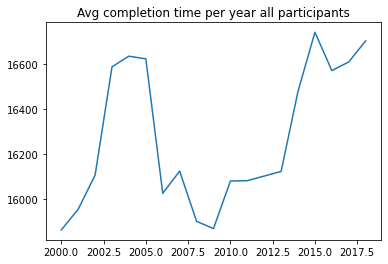

In [56]:
plt.title('Avg completion time per year all participants')
plt.plot(nyc.groupby('year').agg({'time_seconds': 'mean'}));

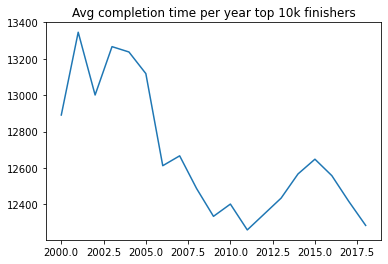

In [57]:
plt.title('Avg completion time per year top 10k finishers')
plt.plot(nyc_10.groupby('year').agg({'time_seconds': 'mean'}));

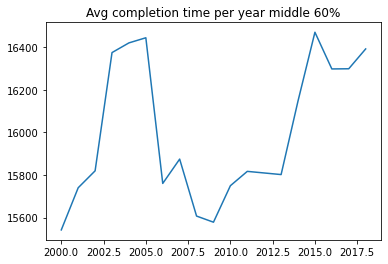

In [58]:
plt.title('Avg completion time per year middle 60%')
plt.plot(nyc_20_80.groupby('year').agg({'time_seconds': 'mean'}));

## Average finish time each year by event

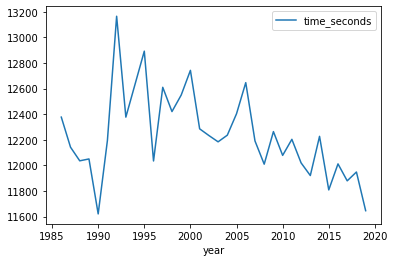

In [59]:
berlin_10.groupby('year').agg({'time_seconds': 'mean'}).plot();

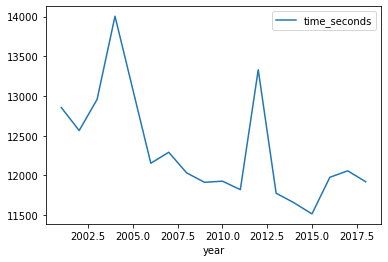

In [60]:
boston_10.groupby('year').agg({'time_seconds': 'mean'}).plot();

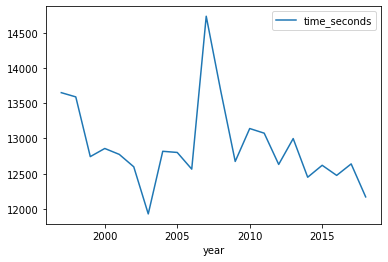

In [61]:
chicago_10.groupby('year').agg({'time_seconds': 'mean'}).plot();

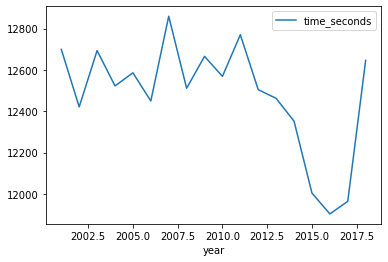

In [62]:
london_10.groupby('year').agg({'time_seconds': 'mean'}).plot();

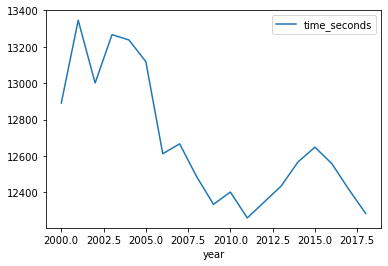

In [63]:
nyc_10.groupby('year').agg({'time_seconds': 'mean'}).plot();

## Age Group EDA

In [64]:
london = pd.read_csv('./data/London_Data/Clean/Clean_London_Results_Weather.csv')
nyc = pd.read_csv('./data/NYC_Data/Clean/Clean_NYC_Results_Weather.csv')
boston = pd.read_csv('./data/Boston_Data/Clean/Clean_Boston_Results_Weather.csv')
berlin = pd.read_csv('./data/Berlin_Data/Clean/Clean_Berlin_Results_Weather.csv')
chicago = pd.read_csv('./data/Chicago_Data/Clean/Clean_Chicago_Results_Weather.csv')

london_dict = prep(london)
nyc_dict = prep(nyc)
boston_dict = prep(boston)
berlin_dict = prep(berlin)
chicago_dict = prep(chicago)

london = n_range(usable(london_dict, 0), 0, 1)
nyc = n_range(usable(nyc_dict, 0), 0, 1)
boston = n_range(usable(boston_dict, 0), 0, 1)
berlin = n_range(usable(berlin_dict, 0), 0, 1)
chicago = n_range(usable(chicago_dict, 0), 0, 1)

events = [berlin, boston, chicago, london, nyc]
count = 0
for event in events:
    event['event'] = count
    count += 1
combined_i = pd.concat(events, ignore_index=True)

aggregate = {col: 'mean' for col in combined_i}

combined = combined_i.groupby(['year','event', 'age', 'male']).agg(aggregate)
combined['age'] = combined['age'].apply(lambda x: undo_age(x))

combined = combined[combined['year'] >= 2000]
combined = combined[combined['year'] < 2019]

combined['event'] = np.where(combined['event'] == 0, 'berlin', 
                            np.where(combined['event'] == 1, 'boston',
                                    np.where(combined['event'] == 2, 'chicago',
                                            np.where(combined['event'] == 3, 'london', 'nyc'))))
combined['male'] = np.where(combined['male'] == 0, 'female', 'male')


combined_i['age'] = combined_i['age'].apply(lambda x: undo_age(x))

combined_i = combined_i[combined_i['year'] >= 2000]
combined_i = combined_i[combined_i['year'] < 2019]

combined_i['event'] = np.where(combined_i['event'] == 0, 'berlin', 
                            np.where(combined_i['event'] == 1, 'boston',
                                    np.where(combined_i['event'] == 2, 'chicago',
                                            np.where(combined_i['event'] == 3, 'london', 'nyc'))))
combined_i['male'] = np.where(combined_i['male'] == 0, 'female', 'male')

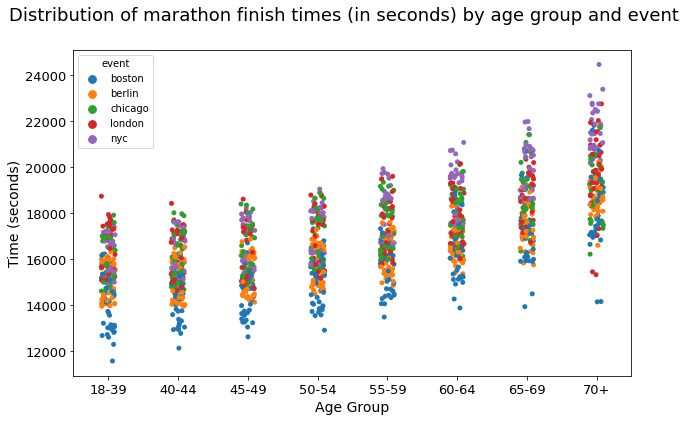

In [70]:
plt.figure(figsize=(10,6))
plt.suptitle("Distribution of marathon finish times (in seconds) by age group and event", fontsize=18)
sns.stripplot(x = 'age', 
            y = 'time_seconds', 
            hue='event',
            hue_order=['boston', 'berlin', 'chicago', 'london', 'nyc'],
            data=combined)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age Group', fontsize=14);
plt.ylabel('Time (seconds)', fontsize=14);

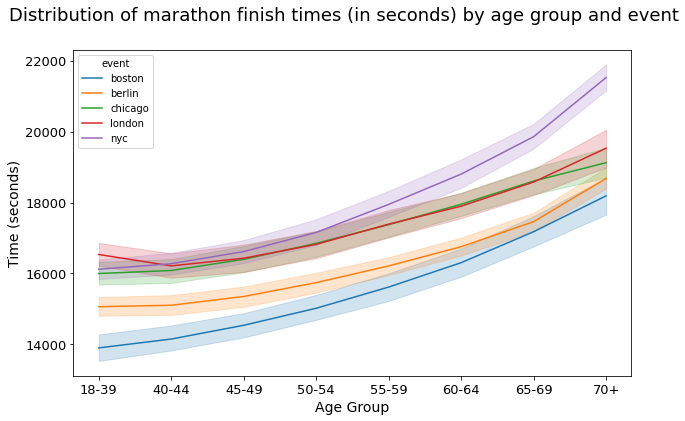

In [69]:
plt.figure(figsize=(10,6))
plt.suptitle("Distribution of marathon finish times (in seconds) by age group and event", fontsize=18)
sns.lineplot(x = 'age', 
            y = 'time_seconds', 
            hue='event',
            hue_order=['boston', 'berlin', 'chicago', 'london', 'nyc'],
            data=combined);
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age Group', fontsize=14);
plt.ylabel('Time (seconds)', fontsize=14);

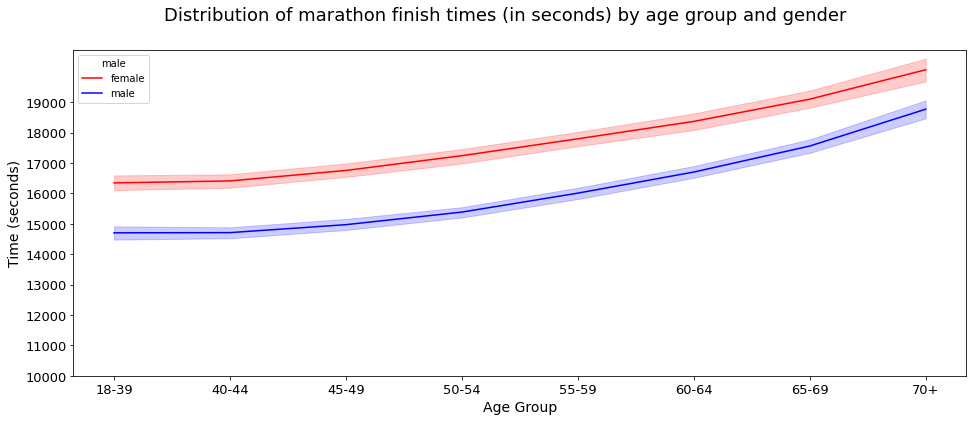

In [77]:
plt.figure(figsize=(16,6))
plt.suptitle("Distribution of marathon finish times (in seconds) by age group and gender", fontsize=18)
sns.lineplot(x = 'age', 
            y = 'time_seconds', 
            hue='male',
            hue_order=['female', 'male'],
            palette=['red', 'blue'],
            data=combined);
plt.xticks(fontsize=13)
plt.yticks(np.arange(10000, 20000, 1000), fontsize=13)
plt.xlabel('Age Group', fontsize=14);
plt.ylabel('Time (seconds)', fontsize=14);

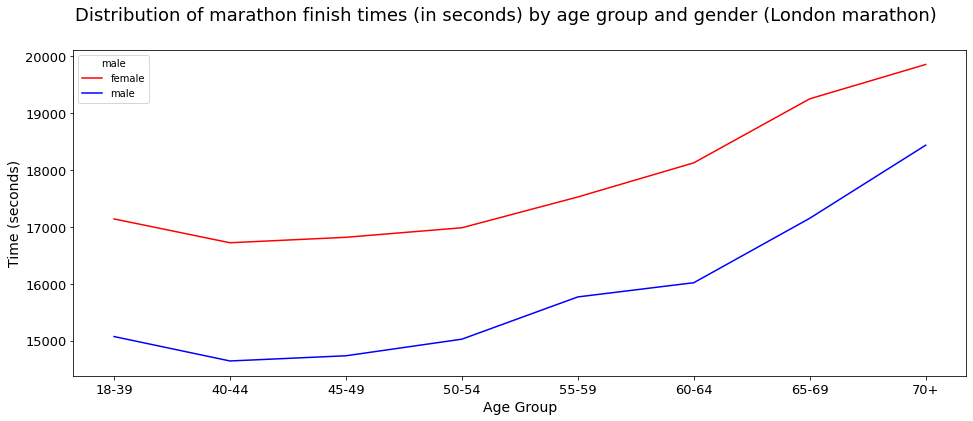

In [68]:
plt.figure(figsize=(16,6))
plt.suptitle("Distribution of marathon finish times (in seconds) by age group and gender (London marathon)", fontsize=18)
sns.lineplot(x = 'age', 
            y = 'time_seconds', 
            hue='male',
            hue_order=['female', 'male'],
            palette=['red', 'blue'],
            data=combined.query('year == 2015').query('event == "london"'));
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age Group', fontsize=14);
plt.ylabel('Time (seconds)', fontsize=14);